# Device Failure Project - Sujal Padhiyar -Part 2

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.model_selection import train_test_split as tts #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [23]:
x=pd.read_csv('dataprep.csv')

In [24]:
x.head()

,Unnamed: 0,failure,attribute4,attribute5,work_days,device_type,att2,att1,att39,att78,month,total_mile
0,0,0,52,6,6,0,7,26953834,7,0,1,1966
1,1,0,0,5,6,0,0,30418260,0,0,5,209
2,2,0,0,6,6,0,0,28042412,3,0,1,1612
3,3,0,0,12,48,0,0,30032246,0,0,2,22097
4,4,0,0,6,6,0,0,29445357,0,0,1,1965


In [25]:
x.device_type.unique()

array([0, 1, 2])

In [26]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 12 columns):
Unnamed: 0     1168 non-null int64
failure        1168 non-null int64
attribute4     1168 non-null int64
attribute5     1168 non-null int64
work_days      1168 non-null int64
device_type    1168 non-null int64
att2           1168 non-null int64
att1           1168 non-null int64
att39          1168 non-null int64
att78          1168 non-null int64
month          1168 non-null int64
total_mile     1168 non-null int64
dtypes: int64(12)
memory usage: 109.6 KB


In [27]:
x=x.drop(['Unnamed: 0'],axis=1)

In [28]:
x.head()

,failure,attribute4,attribute5,work_days,device_type,att2,att1,att39,att78,month,total_mile
0,0,52,6,6,0,7,26953834,7,0,1,1966
1,0,0,5,6,0,0,30418260,0,0,5,209
2,0,0,6,6,0,0,28042412,3,0,1,1612
3,0,0,12,48,0,0,30032246,0,0,2,22097
4,0,0,6,6,0,0,29445357,0,0,1,1965


In [29]:
prep=x.copy()

In [30]:
prep=prep.drop(['failure'],axis=1)

In [31]:
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Scaling

In [32]:
prep_sc=preprocessing.StandardScaler()
x_std = prep_sc.fit_transform(prep)
data_scaled = pd.DataFrame(x_std,columns= prep.columns)

In [33]:
data_scaled.shape

(1168, 10)

In [34]:
data_scaled.head()

,attribute4,attribute5,work_days,device_type,att2,att1,att39,att78,month,total_mile
0,0.534333,-0.521166,-0.980316,-0.971539,-0.137837,-0.442297,-0.061009,-0.063153,-0.986325,-0.804348
1,-0.124349,-0.602038,-0.980316,-0.971539,-0.146541,0.505001,-0.066816,-0.063153,0.208415,-0.852462
2,-0.124349,-0.521166,-0.980316,-0.971539,-0.146541,-0.144641,-0.064327,-0.063153,-0.986325,-0.814042
3,-0.124349,-0.035935,-0.570987,-0.971539,-0.146541,0.399451,-0.066816,-0.063153,-0.687640,-0.253074
4,-0.124349,-0.521166,-0.980316,-0.971539,-0.146541,0.238975,-0.066816,-0.063153,-0.986325,-0.804375


# Train Test Split before Oversampling

In [65]:
from sklearn.cross_validation import train_test_split as tts
x_train, x_val, y_train, y_val = tts(data_scaled,x['failure'],
                                                  test_size = .09,
                                                  random_state=42)
x_train.shape,x_val.shape,y_train.shape,y_val.shape

((1062, 10), (106, 10), (1062,), (106,))

# Oversampling with SMOTE

In [66]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, ratio =1.0)
X_train_res, Y_train_res = sm.fit_sample(x_train,y_train)
X_train_res.shape, Y_train_res.shape

/Users/SKYLER/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


((1926, 10), (1926,))

In [67]:
y_train.value_counts(), np.bincount(Y_train_res)

(0    963
 1     99
 Name: failure, dtype: int64, array([963, 963]))

# Modeling

In [68]:
def Metrics(y_val,pred):
    print('accuray:', accuracy_score(y_val,pred),',recall score:',recall_score(y_val,pred),'\n ConfusionMatrix: \n',confusion_matrix(y_val,pred))
    #model_rf.feature_importances_
    print('Precision Score:',precision_score(y_val,pred),'F1_score:',f1_score(y_val,pred))

In [69]:
from sklearn.metrics import accuracy_score,recall_score, confusion_matrix, roc_curve, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier #Random Forest

rf = RandomForestClassifier(n_estimators=200, min_samples_split=30, \
                            max_depth=30,random_state=42)
model_rf = rf.fit(X_train_res,Y_train_res)
pred_rf = model_rf.predict(x_val)
Metrics(y_val,pred_rf)

accuray: 0.952830188679 ,recall score: 0.714285714286 
 ConfusionMatrix: 
 [[96  3]
 [ 2  5]]
Precision Score: 0.625 F1_score: 0.666666666667


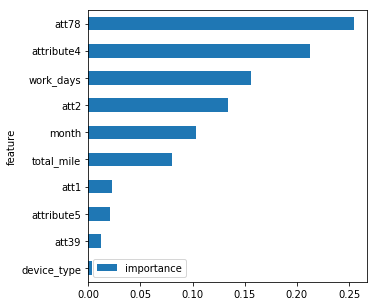

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

features = pd.DataFrame()
features['feature'] = data_scaled.columns
features['importance'] = rf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(5, 5))

# Gradient Boosting

In [71]:
from sklearn.ensemble import GradientBoostingClassifier 
g_clf = GradientBoostingClassifier(n_estimators=100)
g_clf.fit(X_train_res,Y_train_res)
pred_g=g_clf.predict(x_val)
Metrics(y_val,pred_g)

accuray: 0.971698113208 ,recall score: 0.714285714286 
 ConfusionMatrix: 
 [[98  1]
 [ 2  5]]
Precision Score: 0.833333333333 F1_score: 0.769230769231


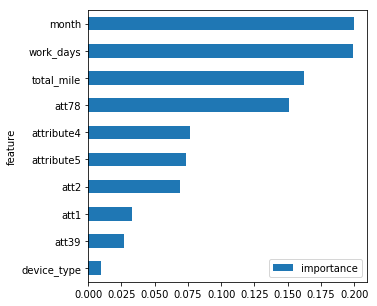

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

features = pd.DataFrame()
features['feature'] = data_scaled.columns
features['importance'] = g_clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(5, 5))

# Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier #Decision Tree
DT = DecisionTreeClassifier(random_state=12)
model_dt = DT.fit(X_train_res,Y_train_res)
pred_dt=model_dt.predict(x_val)
Metrics(y_val,pred_dt)

accuray: 0.962264150943 ,recall score: 0.857142857143 
 ConfusionMatrix: 
 [[96  3]
 [ 1  6]]
Precision Score: 0.666666666667 F1_score: 0.75


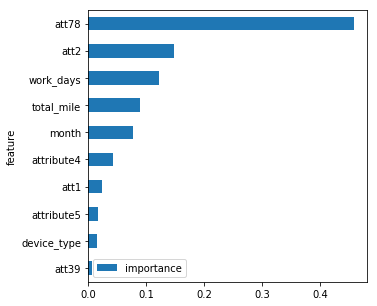

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

features = pd.DataFrame()
features['feature'] = data_scaled.columns
features['importance'] = DT.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(5, 5))